In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import timedelta
import seaborn as sns


In [9]:
noreuse = pd.read_csv('noreuse.stage3.csv',
  names=["File", "Condition", "Metric", "Value"])
reuse = pd.read_csv('reuse.stage3.csv', 
                      names=["File", "Condition", "Metric", "Value"])
print("noreuse"); display(noreuse);
print("reuse"); display(reuse);

noreuse


,File,Condition,Metric,Value
0,binarytrees.lean,reuse_across_ctor_disabled,rss,133312512
1,binarytrees.lean,reuse_across_ctor_disabled,num_alloc,119512
2,binarytrees.lean,reuse_across_ctor_disabled,num_small_alloc,1959133
3,binarytrees.lean,reuse_across_ctor_disabled,num_dealloc,72563
4,binarytrees.lean,reuse_across_ctor_disabled,num_small_dealloc,1582406
...,...,...,...,...
338,workspaceSymbols.lean,reuse_across_ctor_disabled,num_segments,6
339,workspaceSymbols.lean,reuse_across_ctor_disabled,num_pages,6082
340,workspaceSymbols.lean,reuse_across_ctor_disabled,num_exports,0
341,workspaceSymbols.lean,reuse_across_ctor_disabled,num_recycled_pages,10033


reuse


,File,Condition,Metric,Value
0,binarytrees.lean,reuse_across_ctor_disabled,rss,129638400
1,binarytrees.lean,reuse_across_ctor_disabled,num_alloc,119968
2,binarytrees.lean,reuse_across_ctor_disabled,num_small_alloc,1962820
3,binarytrees.lean,reuse_across_ctor_disabled,num_dealloc,72981
4,binarytrees.lean,reuse_across_ctor_disabled,num_small_dealloc,1585957
...,...,...,...,...
338,workspaceSymbols.lean,reuse_across_ctor_disabled,num_segments,6
339,workspaceSymbols.lean,reuse_across_ctor_disabled,num_pages,6082
340,workspaceSymbols.lean,reuse_across_ctor_disabled,num_exports,0
341,workspaceSymbols.lean,reuse_across_ctor_disabled,num_recycled_pages,9994


In [10]:
# Filtering the rows where Metric is 'time_elapsed_ms' and then summing the 'Value' column for both DataFrames
sum_time_elapsed_reuse = reuse[reuse["Metric"] == "time_elapsed_ms"]["Value"].sum()
sum_time_elapsed_no_reuse = noreuse[noreuse["Metric"] == "time_elapsed_ms"]["Value"].sum()

display(sum_time_elapsed_reuse)
display(sum_time_elapsed_no_reuse)

# Ensuring the values are in a compatible format for timedelta
time_reuse = timedelta(milliseconds=int(sum_time_elapsed_reuse))
time_no_reuse = timedelta(milliseconds=int(sum_time_elapsed_no_reuse))

# Formatting as hours:minutes:seconds.milliseconds again
time_format_reuse = str(time_reuse)
time_format_no_reuse = str(time_no_reuse)
display(HTML(f"<h3>time (reuse): {time_format_reuse} | time (noreuse): {time_format_no_reuse}</h3>"))

232959

234638

In [6]:
df_merged = pd.merge(reuse, noreuse, on=["File", "Metric"], suffixes=('_reuse', '_no_reuse'))
display(df_merged)

,File,Condition_reuse,Metric,Value_reuse,Condition_no_reuse,Value_no_reuse
0,binarytrees.lean,reuse_across_ctor_disabled,rss,129638400,reuse_across_ctor_disabled,133312512
1,binarytrees.lean,reuse_across_ctor_disabled,num_alloc,119968,reuse_across_ctor_disabled,119512
2,binarytrees.lean,reuse_across_ctor_disabled,num_small_alloc,1962820,reuse_across_ctor_disabled,1959133
3,binarytrees.lean,reuse_across_ctor_disabled,num_dealloc,72981,reuse_across_ctor_disabled,72563
4,binarytrees.lean,reuse_across_ctor_disabled,num_small_dealloc,1585957,reuse_across_ctor_disabled,1582406
...,...,...,...,...,...,...
2160,workspaceSymbols.lean,reuse_across_ctor_disabled,time_elapsed_ms,18741,reuse_across_ctor_disabled,17727
2161,workspaceSymbols.lean,reuse_across_ctor_disabled,time_elapsed_ms,18741,reuse_across_ctor_disabled,17891
2162,workspaceSymbols.lean,reuse_across_ctor_disabled,time_elapsed_ms,18741,reuse_across_ctor_disabled,17616
2163,workspaceSymbols.lean,reuse_across_ctor_disabled,time_elapsed_ms,18741,reuse_across_ctor_disabled,17853


,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,workspaceSymbols.lean,17202,19775,2573,13.011378
1,workspaceSymbols.lean,17303,19775,2472,12.500632
2,workspaceSymbols.lean,17315,19775,2460,12.439949
3,rbmap_checkpoint.lean,331,378,47,12.433862
4,workspaceSymbols.lean,17404,19775,2371,11.989886
...,...,...,...,...,...
210,reduceMatch.lean,5384,4785,-599,-12.518286
211,reduceMatch.lean,5384,4771,-613,-12.848459
212,reduceMatch.lean,5384,4720,-664,-14.067797
213,reduceMatch.lean,5384,4717,-667,-14.140343


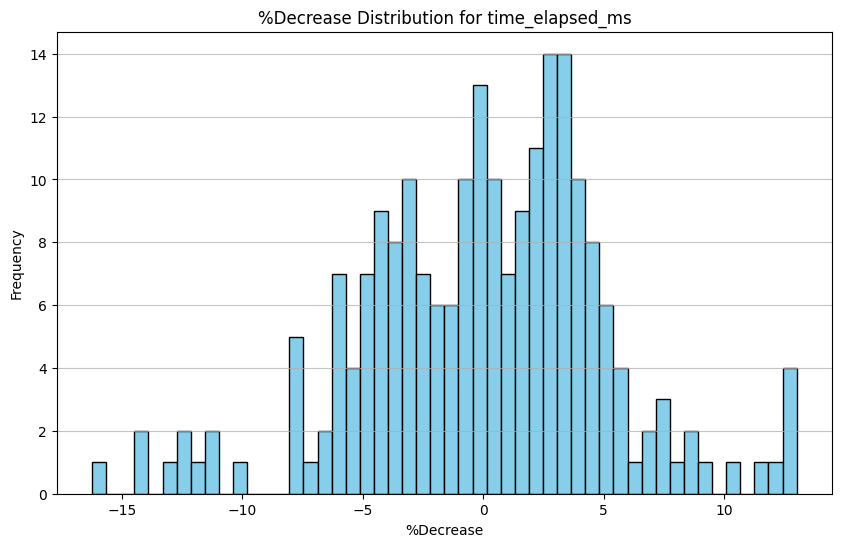

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,rbmap_checkpoint.lean,132259840,136204288,3944448,2.895979
1,qsort.lean,129507328,133181440,3674112,2.758727
2,binarytrees.lean,129638400,133312512,3674112,2.756014
3,rbmap.lean,130818048,134492160,3674112,2.731841
4,rbmap_checkpoint.lean,132526080,136204288,3678208,2.700508
...,...,...,...,...,...
210,workspaceSymbols.lean,504045568,506011648,1966080,0.388544
211,workspaceSymbols.lean,504045568,506011648,1966080,0.388544
212,workspaceSymbols.lean,504045568,506011648,1966080,0.388544
213,workspaceSymbols.lean,504176640,506011648,1835008,0.362641


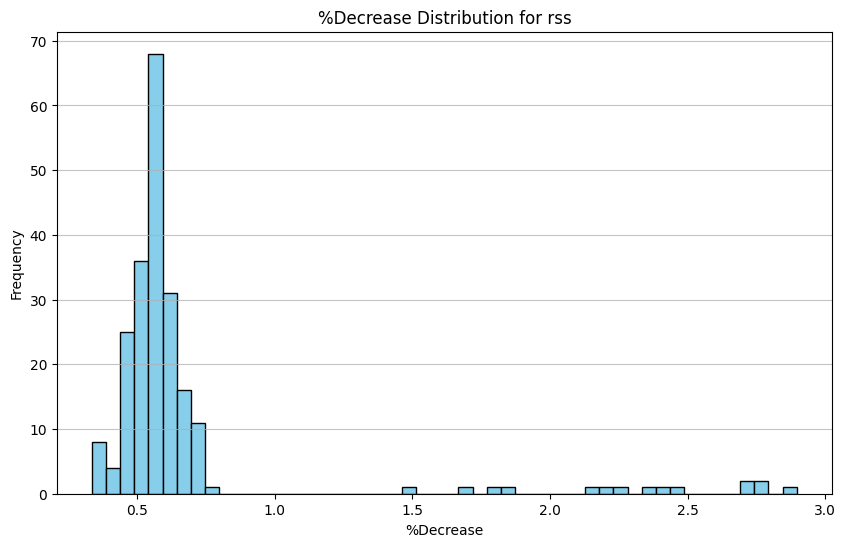

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,rbmap_library.lean,1573209,1583946,10737,0.677864
1,rbmap.lean,2883161,2894864,11703,0.404268
2,rbmap_checkpoint.lean,3421723,3433420,11697,0.340681
3,rbmap_checkpoint.lean,3421723,3433420,11697,0.340681
4,rbmap_checkpoint.lean,3421724,3433420,11696,0.340652
...,...,...,...,...,...
210,parser.lean,1791450,1788407,-3043,-0.170151
211,binarytrees.lean,1962820,1959133,-3687,-0.188195
212,binarytrees.st.lean,1948281,1944509,-3772,-0.193982
213,deriv.lean,5246357,5233290,-13067,-0.249690


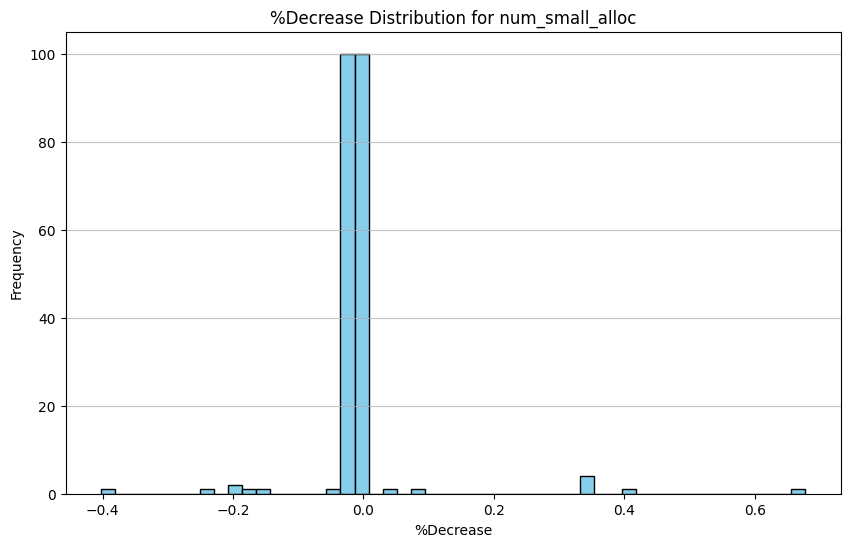

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,rbmap_library.lean,54267,55664,1397,2.509701
1,rbmap.lean,110846,112591,1745,1.549857
2,rbmap_checkpoint.lean,134146,135891,1745,1.284117
3,rbmap_checkpoint.lean,134146,135891,1745,1.284117
4,rbmap_checkpoint.lean,134146,135891,1745,1.284117
...,...,...,...,...,...
210,binarytrees.st.lean,72674,72257,-417,-0.577107
211,parser.lean,50299,49954,-345,-0.690635
212,unionfind.lean,200315,198910,-1405,-0.706350
213,deriv.lean,209941,208118,-1823,-0.875945


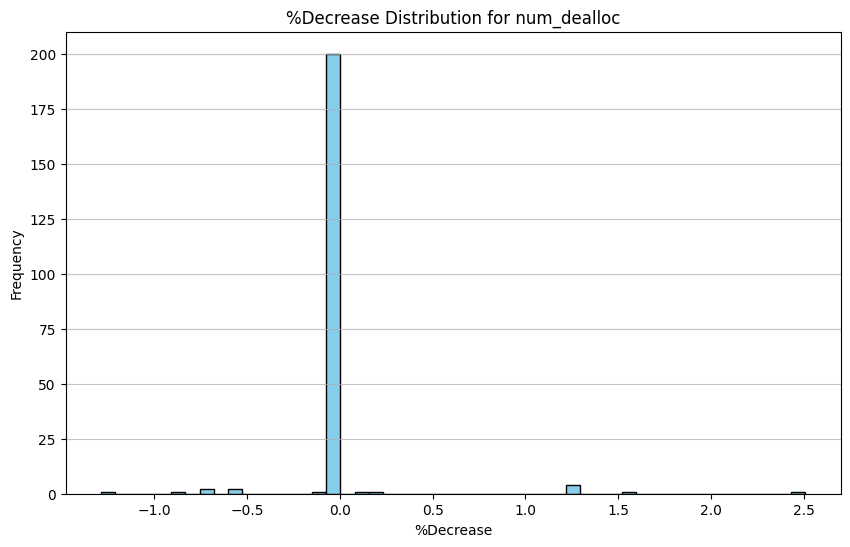

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,rbmap_library.lean,1195909,1206405,10496,0.870023
1,rbmap.lean,2495910,2507479,11569,0.461380
2,rbmap_checkpoint.lean,3031902,3043465,11563,0.379929
3,rbmap_checkpoint.lean,3031902,3043465,11563,0.379929
4,rbmap_checkpoint.lean,3031903,3043465,11562,0.379896
...,...,...,...,...,...
210,binarytrees.lean,1585957,1582406,-3551,-0.224405
211,binarytrees.st.lean,1572109,1568473,-3636,-0.231818
212,parser.lean,1238608,1235712,-2896,-0.234359
213,deriv.lean,4845596,4832951,-12645,-0.261641


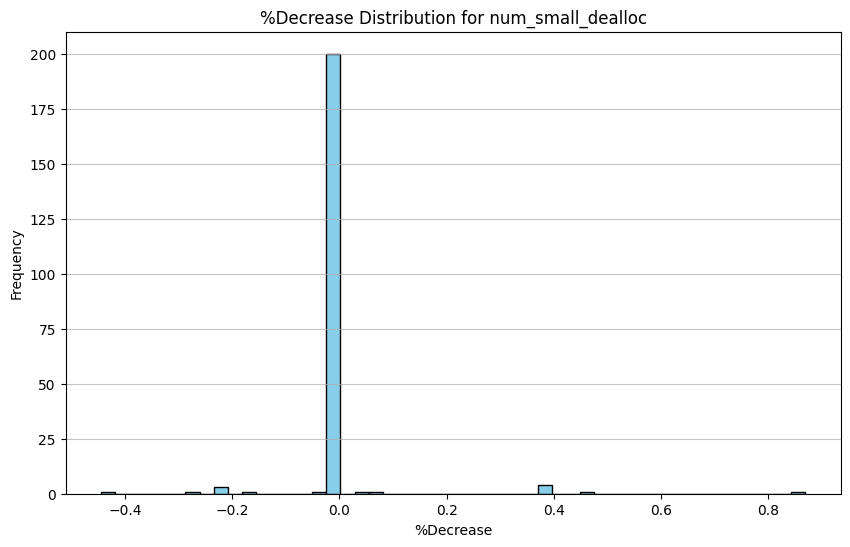

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,rbmap_library.lean,44062,68452,24390,35.630807
1,rbmap.lean,80697,117686,36989,31.430247
2,rbmap_checkpoint.lean,86571,123560,36989,29.936063
3,rbmap_checkpoint.lean,86571,123560,36989,29.936063
4,rbmap_checkpoint.lean,86571,123560,36989,29.936063
5,rbmap_checkpoint.lean,86571,123560,36989,29.936063
6,liasolver.lean,377684,402599,24915,6.188540
7,unionfind.lean,88917,93427,4510,4.827298
8,rbmap_fbip.lean,22247,23039,792,3.437649
9,qsort.lean,48469,47773,-696,-1.456890


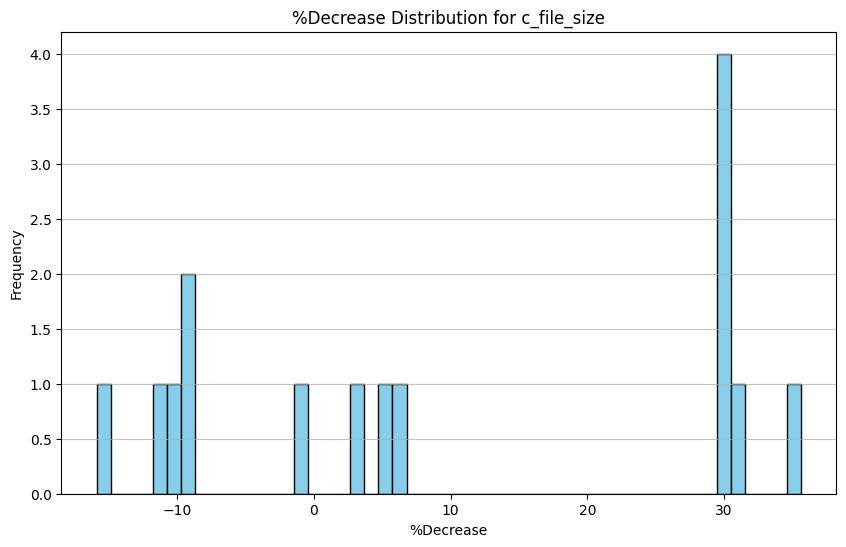

In [7]:
# metrics for which we should compute decreases
df_corr = pd.DataFrame(df_merged["File"].unique(), columns=["File"]) 

for metric in ["time_elapsed_ms", "rss", "num_small_alloc", "num_dealloc", "num_small_dealloc", "c_file_size"]:
  display(HTML(f"<h1>{metric}</h1>"))
  df_metric = df_merged[df_merged["Metric"] == metric].copy()
  df_metric["absolute_diff"] = df_merged["Value_no_reuse"] - df_merged["Value_reuse"]
  df_metric["%Decrease"] = (
    100.0 * (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )
  df_metric = df_metric.drop(["Condition_reuse", "Condition_no_reuse", "Metric"], axis=1)

  df_kv = df_metric[["File", "%Decrease"]].copy()
  df_kv.rename(columns={"%Decrease": metric}, inplace=True)
  # df_corr = pd.merge(df_corr, df_kv, on="File", how="outer")
  
  # Sorting by maximum decrease
  df_metric_sorted = df_metric.sort_values(by="%Decrease", ascending=False)
  df_metric_sorted.reset_index(drop=True, inplace=True) # changes index to start from zero.
  display(df_metric_sorted)
  plt.figure(figsize=(10, 6))
  plt.hist(df_metric_sorted['%Decrease'], bins=50, color='skyblue', edgecolor='black')
  plt.title(f'%Decrease Distribution for {metric}')
  plt.xlabel('%Decrease')
  plt.ylabel('Frequency')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

# corr = df_corr.drop('File', axis=1).corr()  # Assuming df_corr is defined and populated
# plt.figure(figsize=(12,8))
# sns.heatmap(corr, cmap="Greens",annot=True)


In [ ]:
df_full = None

# for each file, grab num alloc and time elapsed.
variant2df = { "reuse" : reuse, "noreuse": noreuse }
for (variant, df) in variant2df.items():
    metric2df = {}
    for metric in ["time_elapsed_ms", "num_alloc"]:
      out = df[df["Metric"] == metric].copy()
      out = out[["File", "Value"]]
      out.rename(columns={"Value" : metric}, inplace=True)
      out = out[["File", metric]].set_index("File")
      metric2df[metric] = out
    
    df_metrics_merged = metric2df["time_elapsed_ms"].join(metric2df["num_alloc"])
    df_metrics_merged = df_metrics_merged.sort_values(by='time_elapsed_ms', ascending=False)

    display(HTML(f"<h3>Correlation: Time elapsed v/s # allocations ({variant})</h3>"))
    display(df_metrics_merged)
    corr = df_metrics_merged.corr()  # Assuming df_corr is defined and populated
    plt.figure(figsize=(4,2))
    sns.heatmap(corr, cmap="Greens",annot=True)
    plt.title(f"Correlation: Time Elapsed v/s # Allocations ({variant})")
    plt.show()

    
    if df_full is None:
        df_full = df_metrics_merged
    else:
        df_full = pd.concat([df_full, df_metrics_merged])

df_full = df_full.sort_values(by='time_elapsed_ms', ascending=False)
display(df_full)
corr = df_full.corr() 
plt.figure(figsize=(4,2))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Correlation: Time Elapsed v/s # Allocations (Aggregate reuse + no reuse)')
plt.show()


In [ ]:
def print_file_info(name):
    for reuses in ["reuse", "no_reuse"]: